In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

df = pd.DataFrame(pd.read_excel("source - Copy.xlsx"))

df.describe()

,Code,group,"urban,rural",Age,education,"Passive smoker (0:NO, 1: Yes)","Pregnancy Supplement (0:NO, 1: Yes)","Positive FH (0:NO, 1: Yes)","Residence near Factory (0:NO, 1: Yes)","Resistence near high voltage tower (0:NO, 1: Yes)",near WiFi,Contact with Pesticides,where do spend mostly during pregnancy,B12 level (160-950),Acid folic (1-15),Zinc (70-114),bmi
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,103.431034,0.379310,0.235632,29.890805,1.534483,0.431034,0.833333,0.086207,0.201149,0.344828,0.235632,0.166667,0.218391,442.853823,12.148627,63.877434,28.276819
std,68.452197,0.486616,0.425618,6.801447,0.816354,0.496650,0.373754,0.281479,0.402016,0.476684,0.425618,0.373754,0.670179,265.880475,5.642733,13.189330,4.975164
min,1.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.300000,33.500000,14.298379
25%,44.250000,0.000000,0.000000,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,345.625000,8.465000,55.300000,25.425380
50%,87.500000,0.000000,0.000000,30.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,410.250000,10.040000,64.200000,27.761100
75%,172.750000,1.000000,0.000000,35.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,471.600000,15.457500,73.000000,30.736569
max,216.000000,1.000000,1.000000,45.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3330.300000,30.210000,107.000000,45.918175


In [46]:
df = df.drop(columns=['Code', 'Name', 'Where they Live?']).dropna()
df['education']=df['education'].astype('category')
df['where do spend mostly during pregnancy']=df['where do spend mostly during pregnancy'].astype('category')

In [47]:
from statsmodels.tools.tools import add_constant
x = df.drop(columns=['group'])
x=add_constant(x)
y = df['group']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sm_scaled = scaler.fit_transform(x)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

                                              feature        VIF
0                                               const  99.732850
1                                         urban,rural   1.224984
2                                                 Age   1.170505
3                                           education   1.225594
4                       Passive smoker (0:NO, 1: Yes)   1.121196
5                 Pregnancy Supplement (0:NO, 1: Yes)   1.281787
6                          Positive FH (0:NO, 1: Yes)   1.160736
7               Residence near Factory (0:NO, 1: Yes)   2.288018
8   Resistence near high voltage tower (0:NO, 1: Yes)   2.488178
9                                           near WiFi   2.527365
10                           Contact with Pesticides    2.214605
11             where do spend mostly during pregnancy   1.079096
12                                B12 level (160-950)   1.099959
13                                  Acid folic (1-15)   1.594631
14                       

In [49]:
modelsm=sm.Logit( y,x)
resultsm = modelsm.fit()

print(resultsm.summary())

Optimization terminated successfully.
         Current function value: 0.311335
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  group   No. Observations:                  174
Model:                          Logit   Df Residuals:                      158
Method:                           MLE   Df Model:                           15
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.5309
Time:                        23:43:01   Log-Likelihood:                -54.172
converged:                       True   LL-Null:                       -115.49
Covariance Type:            nonrobust   LLR p-value:                 5.830e-19
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                         

In [50]:
params = resultsm.params
conf = resultsm.conf_int()

odds_ratios = np.exp(params)
CI_OR = np.exp(conf)

odds_ratios_with_ci = pd.DataFrame({
    "Odds Ratio": odds_ratios,
    "CI Lower 95%": CI_OR[0],
    "CI Upper 95%": CI_OR[1]
})

print(odds_ratios_with_ci)

                                                    Odds Ratio  CI Lower 95%  \
const                                              1094.499516      2.962638   
urban,rural                                           1.737965      0.506379   
Age                                                   1.039770      0.958899   
education                                             1.303477      0.695004   
Passive smoker (0:NO, 1: Yes)                         0.508702      0.172338   
Pregnancy Supplement (0:NO, 1: Yes)                   0.050805      0.009057   
Positive FH (0:NO, 1: Yes)                           10.336172      1.440092   
Residence near Factory (0:NO, 1: Yes)                 0.193543      0.030611   
Resistence near high voltage tower (0:NO, 1: Yes)    20.856710      3.655950   
near WiFi                                             7.553665      0.875820   
Contact with Pesticides                               0.079513      0.008861   
where do spend mostly during pregnancy  

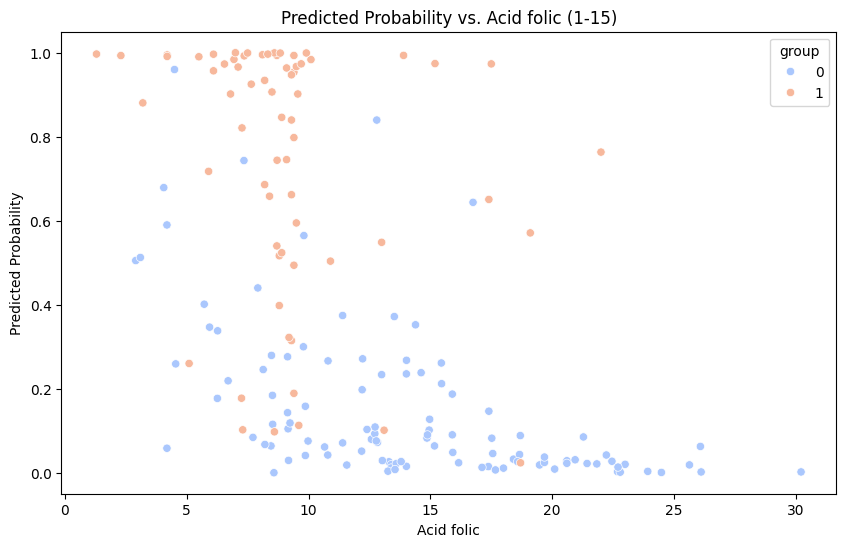

In [51]:
pred_prob = resultsm.predict(x)
df['Predicted Probability'] = pred_prob

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Acid folic (1-15)', y='Predicted Probability', hue='group', palette='coolwarm')
plt.title('Predicted Probability vs. Acid folic (1-15)')
plt.xlabel('Acid folic')
plt.ylabel('Predicted Probability')
plt.show()


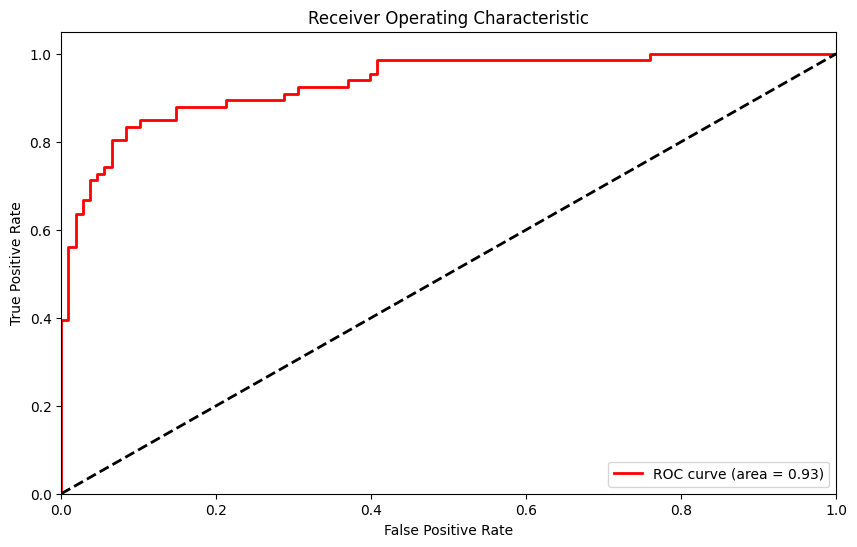

In [52]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y, pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_35180\1191722228.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=conf, x='Coef', y='Feature', join=False)


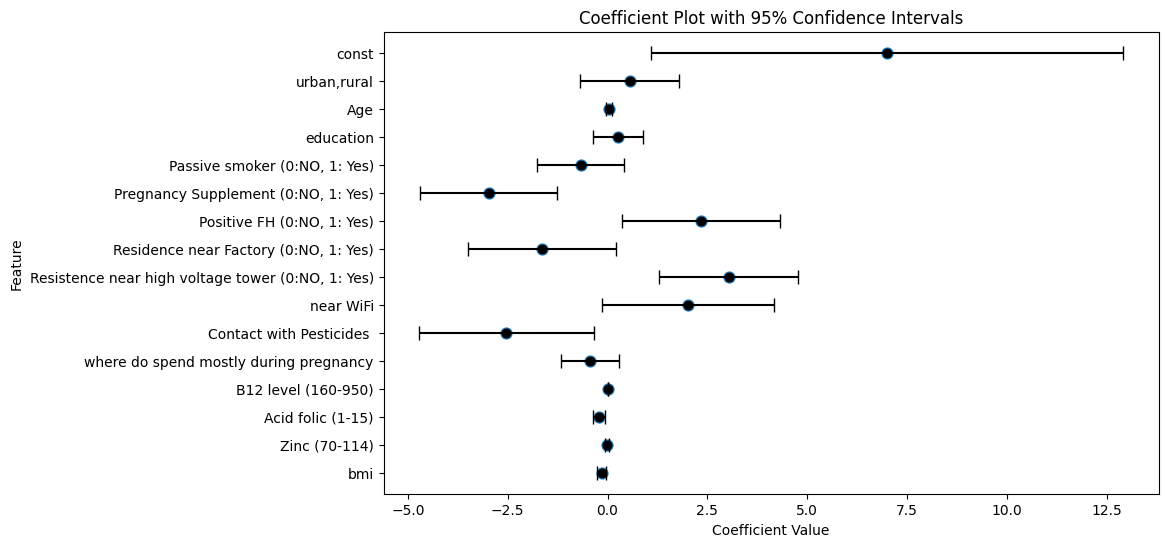

In [53]:
coef = resultsm.params
conf = resultsm.conf_int()
conf = conf.rename(columns={0: 'CI Lower', 1: 'CI Upper'})
conf['Coef'] = coef
conf = conf.reset_index()
conf.columns = ['Feature', 'CI Lower', 'CI Upper', 'Coef']

plt.figure(figsize=(10, 6))
sns.pointplot(data=conf, x='Coef', y='Feature', join=False)
plt.errorbar(conf['Coef'], conf['Feature'], xerr=[conf['Coef'] - conf['CI Lower'], conf['CI Upper'] - conf['Coef']], fmt='o', color='black', capsize=5)
plt.title('Coefficient Plot with 95% Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_35180\677146317.py:18: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=odds_ratios_with_ci, x='Odds Ratio', y='Feature', join=False)


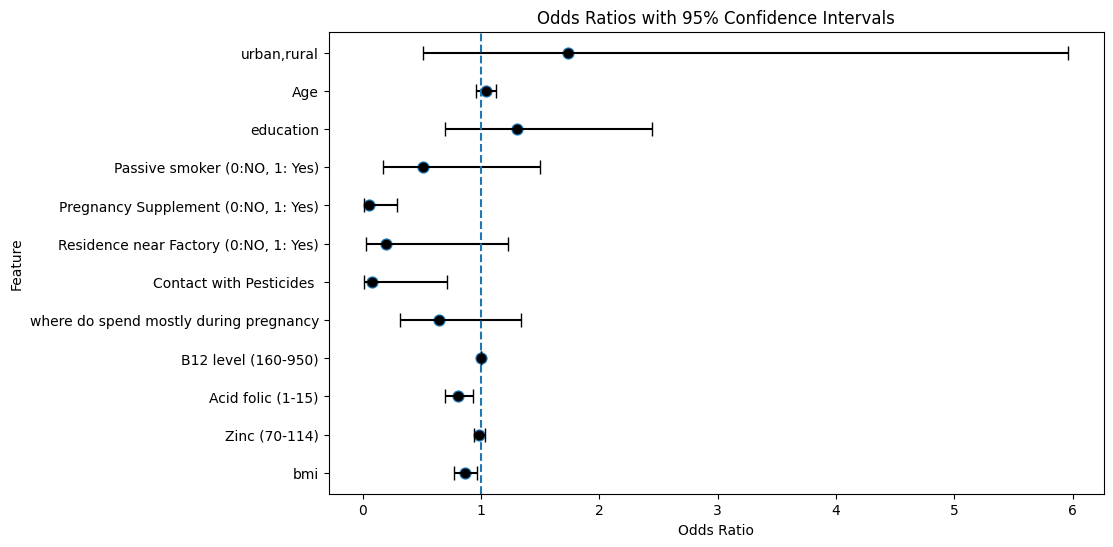

In [54]:
odds_ratios_with_ci = pd.DataFrame({
    "Odds Ratio": odds_ratios,
    "CI Lower 95%": CI_OR[0],
    "CI Upper 95%": CI_OR[1]
}, index=x.columns)


odds_ratios_with_ci = odds_ratios_with_ci[odds_ratios_with_ci.index != 'const']
odds_ratios_with_ci = odds_ratios_with_ci[odds_ratios_with_ci.index != 'Resistence near high voltage tower (0:NO, 1: Yes)']
odds_ratios_with_ci = odds_ratios_with_ci[odds_ratios_with_ci.index != 'Positive FH (0:NO, 1: Yes)']
odds_ratios_with_ci = odds_ratios_with_ci[odds_ratios_with_ci.index != 'near WiFi']

odds_ratios_with_ci = odds_ratios_with_ci.reset_index()
odds_ratios_with_ci.columns = ['Feature', 'Odds Ratio', 'CI Lower 95%', 'CI Upper 95%']


plt.figure(figsize=(10, 6))
sns.pointplot(data=odds_ratios_with_ci, x='Odds Ratio', y='Feature', join=False)
plt.errorbar(odds_ratios_with_ci['Odds Ratio'], odds_ratios_with_ci['Feature'],
             xerr=[odds_ratios_with_ci['Odds Ratio'] - odds_ratios_with_ci['CI Lower 95%'],
                   odds_ratios_with_ci['CI Upper 95%'] - odds_ratios_with_ci['Odds Ratio']],
             fmt='o', color='black', capsize=5)
plt.title('Odds Ratios with 95% Confidence Intervals')
plt.axvline(x=1, linestyle='--')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.show()

<Figure size 800x600 with 0 Axes>

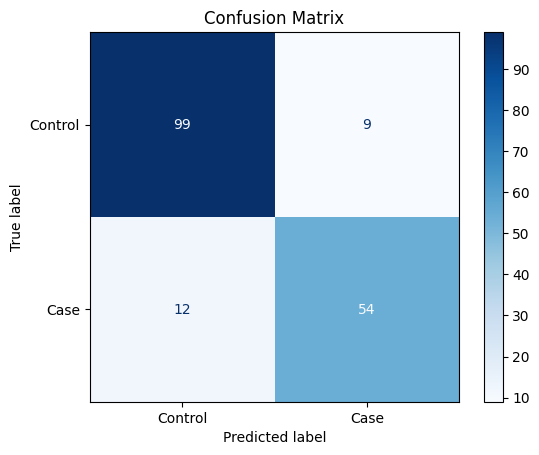

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = resultsm.predict(x) > 0.5  # assuming a threshold of 0.5

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Control', 'Case'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [56]:
from sklearn.metrics import classification_report

report = classification_report(y, y_pred, target_names=['Control', 'Case'])

print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     Control       0.89      0.92      0.90       108
        Case       0.86      0.82      0.84        66

    accuracy                           0.88       174
   macro avg       0.87      0.87      0.87       174
weighted avg       0.88      0.88      0.88       174



In [57]:
mcfadden_r2 = 1 - (resultsm.llf / resultsm.llnull)
print(f"McFadden's R-squared: {mcfadden_r2:.4f}")


McFadden's R-squared: 0.5309


In [58]:
aic = resultsm.aic
print(f"AIC: {aic:.4f}")


AIC: 140.3447
